In [415]:
def runDFA(M, word, Verbose=False):
    
    _Sigma, _Q, _delta, _q0, _F = M
    
    state = _q0
    _word = list(word)
    
    if type(_q0) is not str:
        if Verbose:
            print "Initial state must be a single String"
        return False
    
    if len(_q0) == 0:
        if Verbose:
            print "Initial state not defined!"
        return False
    
    if len(_F) == 0:
        if Verbose:
            print "Final state(s) not defined!"
        return False
    
    out_of_Q = [False for m in _delta if m[0][0] not in _Q or m[1] not in _Q]
    unknown_states = len(out_of_Q)
    if unknown_states > 0:
        if Verbose:
            print "Error: {!s} state(s) declared in delta don't belong to Q".format(unknown_states)
        return False
    
    out_of_Sigma = [False for s in _word if s not in _Sigma]
    strange_symbols = len(out_of_Sigma)
    if strange_symbols > 0:
        if Verbose:
            print "Word not accepted!"
            print "{!s} letter(s) don't belong to the alphabet!".format(strange_symbols)
        return False
    
    if Verbose:
        print "Started running the Deterministic Finite Automaton!"
    
    for i in _word:
        if Verbose:
            print "{!s} going through \"{!s}\" from state \"{!s}\"...".format("----->", i, state)
        
        try:
            state = [m[1] for m in _delta if m[0] == (state,i)][0]
        except IndexError:
            if Verbose:
                print "Word not accepted!"
                print "No path with \"{!s}\" in state \"{!s}\"!".format(i,state)
            return False
        
        if Verbose:
            print "{!s:>6} new state is \"{!s}\"!".format("-->", state)
        
    if state in _F:
        if Verbose:
            print "Accepted!"
            print "Word \"{!s}\" is valid!".format(word)
        return True
    else:
        if Verbose:
            print "Not accepted!"
            print "Word: \"{!s}\" is not valid!".format(word)
        return False

In [505]:
from IPython.display import Image 
import itertools
import pydot

def drawDFA(M, Save=False, Name="DFA_image"):
    graph_kwargs = {
        'rankdir': 'LR',
        'graph_type': 'digraph'
    }
    
    graph = pydot.Dot(**graph_kwargs)
    
    _Sigma, _Q, _delta, _q0, _F = M
    
    graph.add_node(pydot.Node('start', shape='point', style='invis'))
    
    for k in _Q:
        if k in _F:
            graph.add_node(pydot.Node(k, shape="doublecircle"))
        else:
            graph.add_node(pydot.Node(k, shape="circle"))
            
    graph.add_edge(pydot.Edge('start',_q0))
    
    data_preparation = [[k,[[x[1],x[0][1]] for x in g]] 
                        for k, g in itertools.groupby(sorted(_delta, key=lambda l:l[0][0]), lambda l:l[0][0])]
    
    data = {}

    for w in data_preparation:
        data[w[0]] = [[k,', '.join(sorted([x[1] for x in g]))] 
             for k, g in itertools.groupby(sorted(w[1], key=lambda l:l[0]), lambda l:l[0])]
    
    for key in data.iteritems():
        for v in key[1]:
            current_state, path, next_state = key[0], v[1], v[0]
            graph.add_edge(pydot.Edge(current_state, next_state, label=path))
        
    if Save:
        graph.write_png(Name)
        
    return Image(graph.create_png())

In [506]:
Sigma = {'a','b','c'}
Q = {'e0','e1','e2', 'e3'}
delta = {(('e0','a'),'e1'),\
         (('e0','b'),'e0'),\
         (('e0','c'),'e0'),\
         (('e1','a'),'e1'),\
         (('e1','b'),'e2'),\
         (('e1','c'),'e0'),\
         (('e2','a'),'e1'),\
         (('e2','b'),'e0'),\
         (('e2','c'),'e3'),\
         (('e3','a'),'e1'),\
         (('e3','b'),'e0'),\
         (('e3','c'),'e0')}
q0 = 'e0'
F = {'e3'}
    
M = (Sigma, Q, delta, q0, F)


In [507]:
word = "ababc"

In [508]:
runDFA(M, word)

True

In [509]:
word = "abaabc"

In [510]:
runDFA(M, word)

True

In [511]:
word = "aabca"

In [512]:
runDFA(M, word)

False

In [513]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "a" from state "e1"...
   --> new state is "e1"!
-----> going through "b" from state "e1"...
   --> new state is "e2"!
-----> going through "c" from state "e2"...
   --> new state is "e3"!
-----> going through "a" from state "e3"...
   --> new state is "e1"!
Not accepted!
Word: "aabca" is not valid!


False

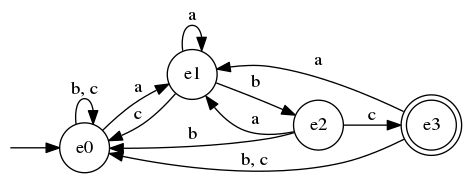

In [514]:
drawDFA(M)

In [515]:
Sigma = {'a','b'}
Q = {'e0','e1','e2', 'e3'}
delta = {(('e0','a'),'e1'),\
         (('e0','b'),'e3'),\
         (('e1','a'),'e0'),\
         (('e1','b'),'e2'),\
         (('e2','a'),'e3'),\
         (('e2','b'),'e1'),\
         (('e3','a'),'e2'),\
         (('e3','b'),'e0')}
q0 = 'e0'
F = {'e3'}
    
M = (Sigma, Q, delta, q0, F)

In [516]:
word = "ababb"

In [517]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "b" from state "e1"...
   --> new state is "e2"!
-----> going through "a" from state "e2"...
   --> new state is "e3"!
-----> going through "b" from state "e3"...
   --> new state is "e0"!
-----> going through "b" from state "e0"...
   --> new state is "e3"!
Accepted!
Word "ababb" is valid!


True

In [518]:
word = "aababb"

In [519]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "a" from state "e1"...
   --> new state is "e0"!
-----> going through "b" from state "e0"...
   --> new state is "e3"!
-----> going through "a" from state "e3"...
   --> new state is "e2"!
-----> going through "b" from state "e2"...
   --> new state is "e1"!
-----> going through "b" from state "e1"...
   --> new state is "e2"!
Not accepted!
Word: "aababb" is not valid!


False

In [520]:
word = "aabmcabb"

In [521]:
runDFA(M, word, Verbose=True)

Word not accepted!
2 letter(s) don't belong to the alphabet!


False

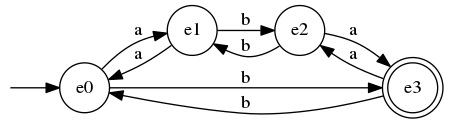

In [522]:
drawDFA(M)

In [523]:
Sigma = {'a','b','c'}
Q = {'e0','e1','e2'}
delta = {(('e0','a'),'e1'),\
         (('e0','b'),'e0'),\
         (('e0','c'),'e0'),\
         (('e1','a'),'e2'),\
         (('e1','b'),'e1'),\
         (('e1','c'),'e1'),\
         (('e2','a'),'e2'),\
         (('e2','b'),'e2'),\
         (('e2','c'),'e2')}
q0 = 'e0'
F = {'e2'}
    
M = (Sigma, Q, delta, q0, F)

In [524]:
word = "bcab"

In [525]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "b" from state "e0"...
   --> new state is "e0"!
-----> going through "c" from state "e0"...
   --> new state is "e0"!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "b" from state "e1"...
   --> new state is "e1"!
Not accepted!
Word: "bcab" is not valid!


False

In [526]:
word = "aaabcbc"

In [527]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "a" from state "e1"...
   --> new state is "e2"!
-----> going through "a" from state "e2"...
   --> new state is "e2"!
-----> going through "b" from state "e2"...
   --> new state is "e2"!
-----> going through "c" from state "e2"...
   --> new state is "e2"!
-----> going through "b" from state "e2"...
   --> new state is "e2"!
-----> going through "c" from state "e2"...
   --> new state is "e2"!
Accepted!
Word "aaabcbc" is valid!


True

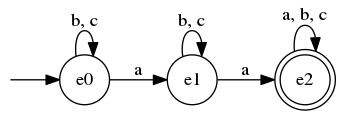

In [528]:
drawDFA(M)

In [529]:
Sigma = {'a','b','c'}
Q = {'e0','e1','e2','e3','e4'}
delta = {(('e0','a'),'e1'),\
         (('e0','b'),'e0'),\
         (('e0','c'),'e3'),\
         (('e1','a'),'e1'),\
         (('e1','b'),'e2'),\
         (('e1','c'),'e3'),\
         (('e2','a'),'e1'),\
         (('e2','b'),'e0'),\
         (('e2','c'),'e3'),\
         (('e3','a'),'e4'),\
         (('e3','b'),'e0'),\
         (('e3','c'),'e3'),\
         (('e4','a'),'e1'),\
         (('e4','b'),'e2'),\
         (('e4','c'),'e3')}
q0 = 'e0'
F = {'e2','e4'}
    
M = (Sigma, Q, delta, q0, F)

In [530]:
word = "abcccccb"

In [531]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "b" from state "e1"...
   --> new state is "e2"!
-----> going through "c" from state "e2"...
   --> new state is "e3"!
-----> going through "c" from state "e3"...
   --> new state is "e3"!
-----> going through "c" from state "e3"...
   --> new state is "e3"!
-----> going through "c" from state "e3"...
   --> new state is "e3"!
-----> going through "c" from state "e3"...
   --> new state is "e3"!
-----> going through "b" from state "e3"...
   --> new state is "e0"!
Not accepted!
Word: "abcccccb" is not valid!


False

In [532]:
word = "acabca"

In [533]:
runDFA(M, word, Verbose=True)

Started running the Deterministic Finite Automaton!
-----> going through "a" from state "e0"...
   --> new state is "e1"!
-----> going through "c" from state "e1"...
   --> new state is "e3"!
-----> going through "a" from state "e3"...
   --> new state is "e4"!
-----> going through "b" from state "e4"...
   --> new state is "e2"!
-----> going through "c" from state "e2"...
   --> new state is "e3"!
-----> going through "a" from state "e3"...
   --> new state is "e4"!
Accepted!
Word "acabca" is valid!


True

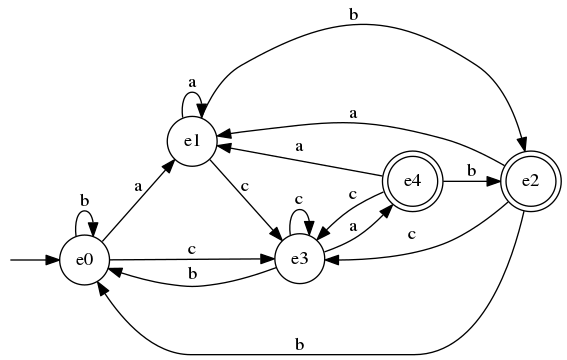

In [534]:
drawDFA(M)